# Visual Demonstration of Bayesian Optimization

We just want to take the BoTorch package out for a spin.

The Ackley Function has a global optima at (0, 0), with many local optima that would inhibit standard optimization functions. We want to see how might Bayesian Optimization determine the global optima in this adversarial case.

In [1]:
import torch
torch.set_default_dtype(torch.float64)

from botorch.acquisition import ExpectedImprovement, NoisyExpectedImprovement,\
    PosteriorMean, UpperConfidenceBound
from botorch.optim import optimize_acqf
from botorch.models import SingleTaskGP, FixedNoiseGP
from botorch.fit import fit_gpytorch_mll
from botorch.test_functions import synthetic

from gpytorch.mlls import ExactMarginalLogLikelihood
from gpytorch.likelihoods import FixedNoiseGaussianLikelihood

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Ackley function

#### True function surface shows many local minima, with global minimum at 0.

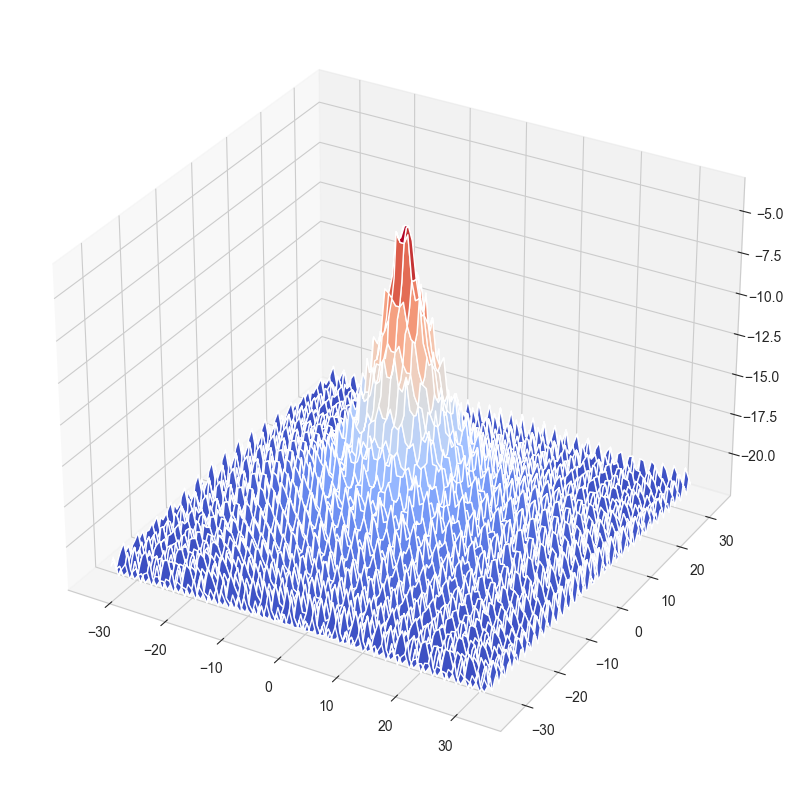

In [2]:
rv = synthetic.Ackley(dim=2)

xs = torch.linspace(-32.768, 32.768, 100)
ys = torch.linspace(-32.768, 32.768, 100)
x, y = torch.meshgrid(xs, ys, indexing='xy')

X = torch.cartesian_prod(xs, ys)
z = rv.evaluate_true(X) * -1.

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X[:,0].numpy().reshape(100, 100), 
                X[:,1].numpy().reshape(100, 100), 
                z.numpy().reshape(100, 100),
                cmap=cm.coolwarm)

## Expected Improvement acquisition function
- Instantiate a standard GP. 
- Use the ExpectedImprovement acquisition function.
- Doing random sampling, retrain GP likelihood each time, see the fit after 100 iterations.

In [10]:
def fit_mll_and_recommend(X, y, gp, likelihood, acquisition_function, 
                          acq_function_args={},
                          gp_args=None,
                          bounds=None, maximize=True):
    if gp_args is None:
        model = gp(train_X=X, train_Y=y)
    else:
        model = gp(train_X=X, train_Y=y, **gp_args)
    mll = likelihood(model.likelihood, model)
    fit_gpytorch_mll(mll)
    if maximize:
        best_value = y.max()
    else:
        best_value = y.min()
    if acq_function_args is None:
        acq = acquisition_function(model=model, best_f=best_value, maximize=maximize)
    else: 
        acq = acquisition_function(model=model, best_f=best_value, maximize=maximize, **acq_function_args)
    
    new_point, _ = optimize_acqf(
        acq_function=acq,
        bounds=bounds,
        q=1,
        num_restarts=20,
        raw_samples=100,
        return_best_only=True,
        options={})
    
    return new_point, model, mll, acq, bounds

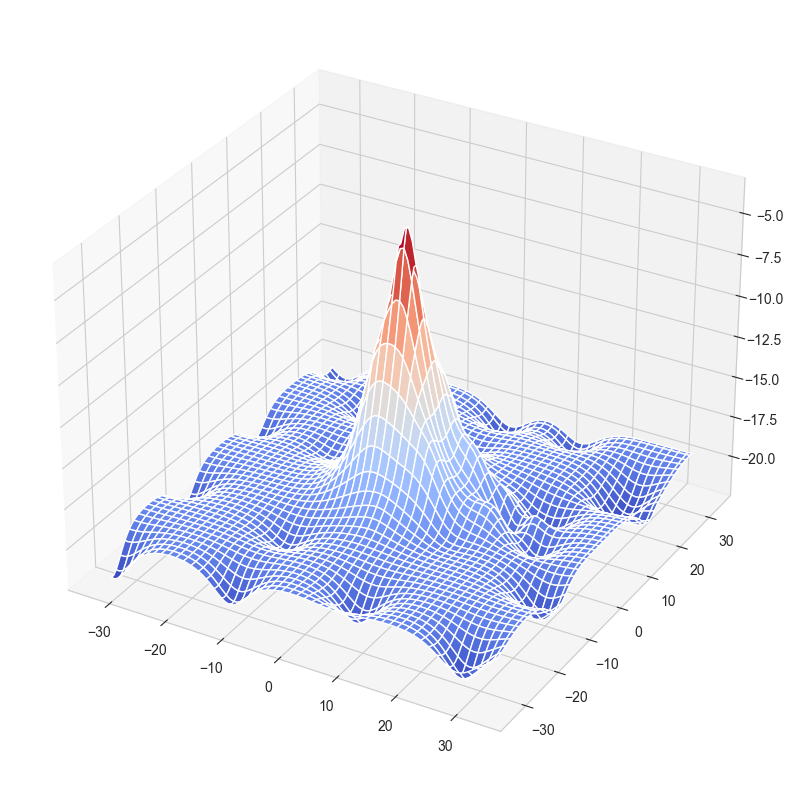

In [7]:
initial_X = torch.tensor([[30., 20.],
                          [20., 5.]])
initial_y = rv.evaluate_true(initial_X).unsqueeze(-1)

for i in range(100):
    new_eval_point, model, likelihood = fit_mll_and_recommend(X=initial_X,
        y=initial_y,
        gp=SingleTaskGP,
        likelihood=ExactMarginalLogLikelihood,
        acquisition_function=ExpectedImprovement,
        bounds=torch.tensor([[-32.768] * 2, [32.768] * 2]),
        maximize=False)

    initial_X = torch.cat([initial_X, new_eval_point])
    initial_y = rv.evaluate_true(initial_X).unsqueeze(-1)
    
with torch.no_grad():
    preds = model.likelihood(model(X)).mean
    
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X[:,0].numpy().reshape(100, 100), 
                X[:,1].numpy().reshape(100, 100), 
                preds.numpy().reshape(100, 100) * -1.,
                cmap=cm.coolwarm)

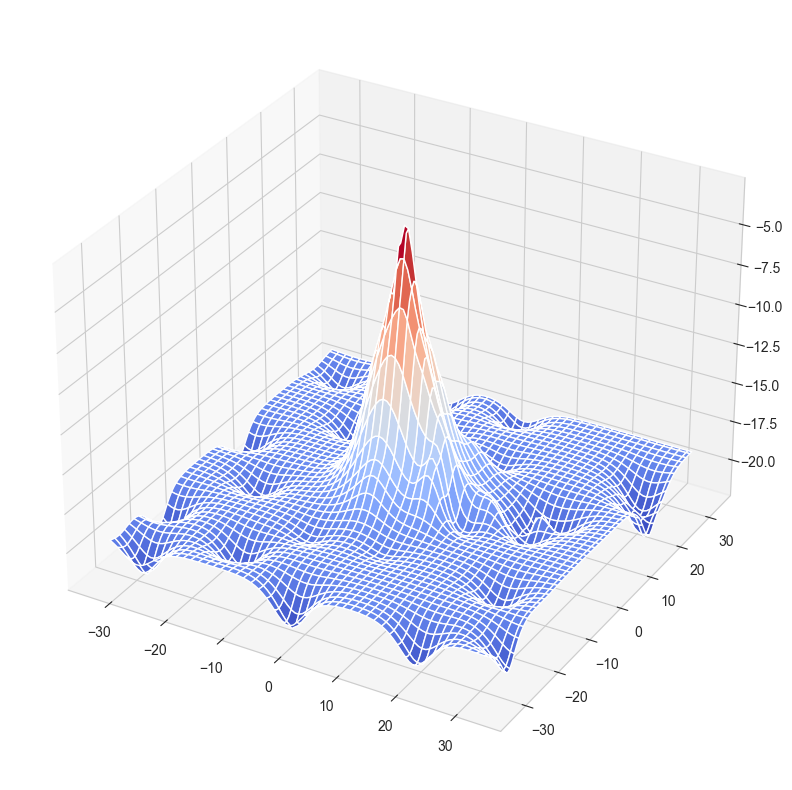

In [5]:
initial_X = torch.tensor([[30., 20.],
                          [20., 5.]])
initial_y = rv.evaluate_true(initial_X).unsqueeze(-1)

for i in range(100):
    new_eval_point, model, likelihood = fit_mll_and_recommend(X=initial_X,
        y=initial_y,
        gp=SingleTaskGP,
        likelihood=ExactMarginalLogLikelihood,
        acquisition_function=ExpectedImprovement,
        bounds=torch.tensor([[-32.768] * 2, [32.768] * 2]),
        maximize=False)

    initial_X = torch.cat([initial_X, new_eval_point])
    initial_y = rv.evaluate_true(initial_X).unsqueeze(-1)
    
with torch.no_grad():
    preds = model.likelihood(model(X)).mean
    
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X[:,0].numpy().reshape(100, 100), 
                X[:,1].numpy().reshape(100, 100), 
                preds.numpy().reshape(100, 100) * -1.,
                cmap=cm.coolwarm)

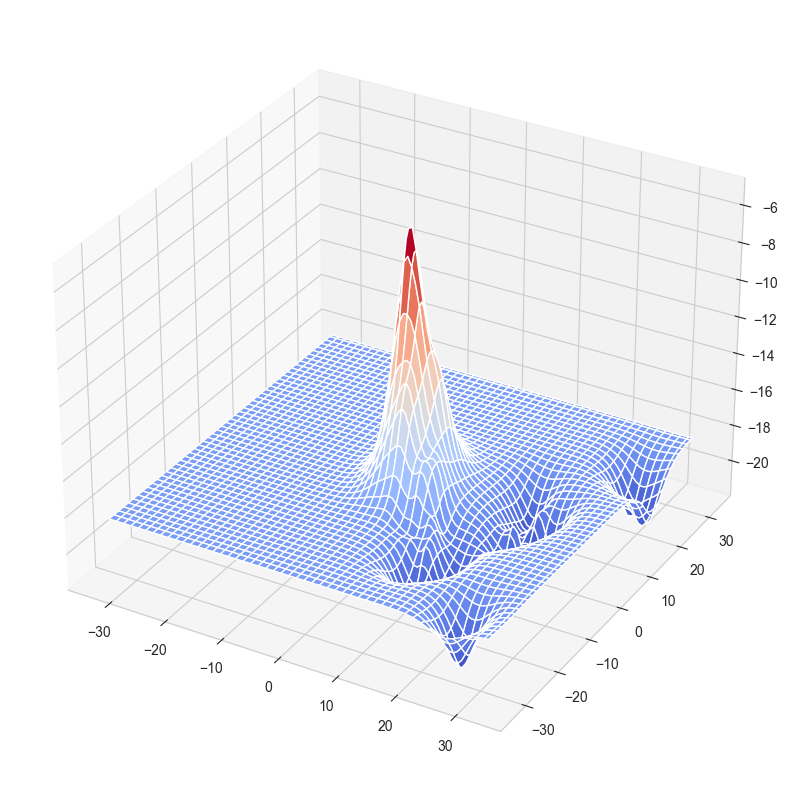

In [6]:
initial_X = torch.tensor([[30., 20.],
                          [20., 5.]])
initial_y = rv.evaluate_true(initial_X).unsqueeze(-1)

for i in range(100):
    new_eval_point, model, likelihood = fit_mll_and_recommend(X=initial_X,
        y=initial_y,
        gp=SingleTaskGP,
        likelihood=ExactMarginalLogLikelihood,
        acquisition_function=ExpectedImprovement,
        bounds=torch.tensor([[-32.768] * 2, [32.768] * 2]),
        maximize=False)

    initial_X = torch.cat([initial_X, new_eval_point])
    initial_y = rv.evaluate_true(initial_X).unsqueeze(-1)
    
with torch.no_grad():
    preds = model.likelihood(model(X)).mean
    
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X[:,0].numpy().reshape(100, 100), 
                X[:,1].numpy().reshape(100, 100), 
                preds.numpy().reshape(100, 100) * -1.,
                cmap=cm.coolwarm)

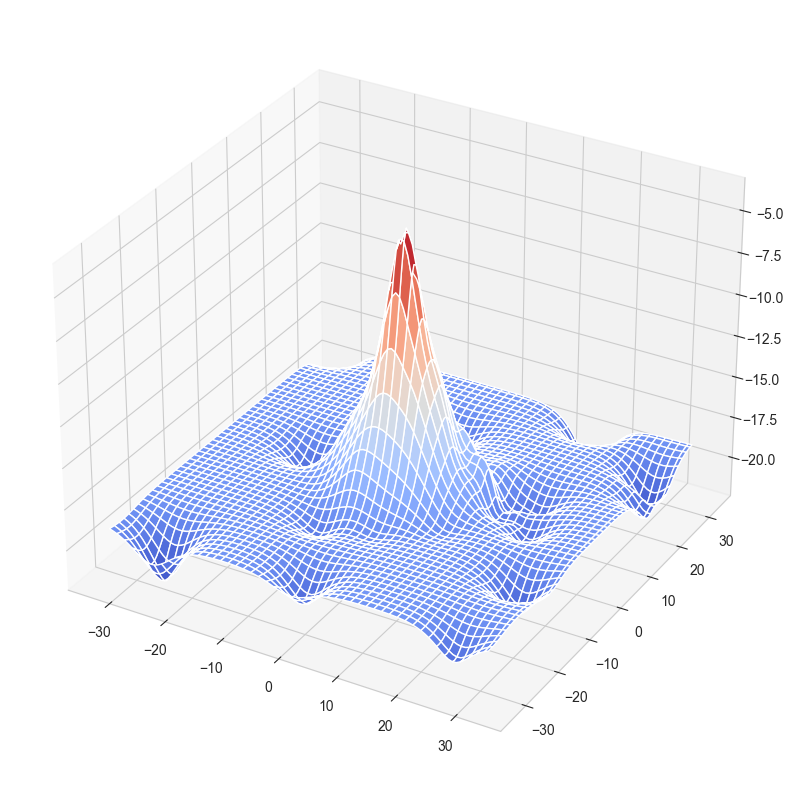

In [7]:
initial_X = torch.tensor([[30., 20.],
                          [20., 5.]])
initial_y = rv.evaluate_true(initial_X).unsqueeze(-1)

for i in range(100):
    new_eval_point, model, likelihood = fit_mll_and_recommend(X=initial_X,
        y=initial_y,
        gp=SingleTaskGP,
        likelihood=ExactMarginalLogLikelihood,
        acquisition_function=ExpectedImprovement,
        bounds=torch.tensor([[-32.768] * 2, [32.768] * 2]),
        maximize=False)

    initial_X = torch.cat([initial_X, new_eval_point])
    initial_y = rv.evaluate_true(initial_X).unsqueeze(-1)
    
with torch.no_grad():
    preds = model.likelihood(model(X)).mean
    
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X[:,0].numpy().reshape(100, 100), 
                X[:,1].numpy().reshape(100, 100), 
                preds.numpy().reshape(100, 100) * -1.,
                cmap=cm.coolwarm)

## Upper Confidence Bound Acquisition Function

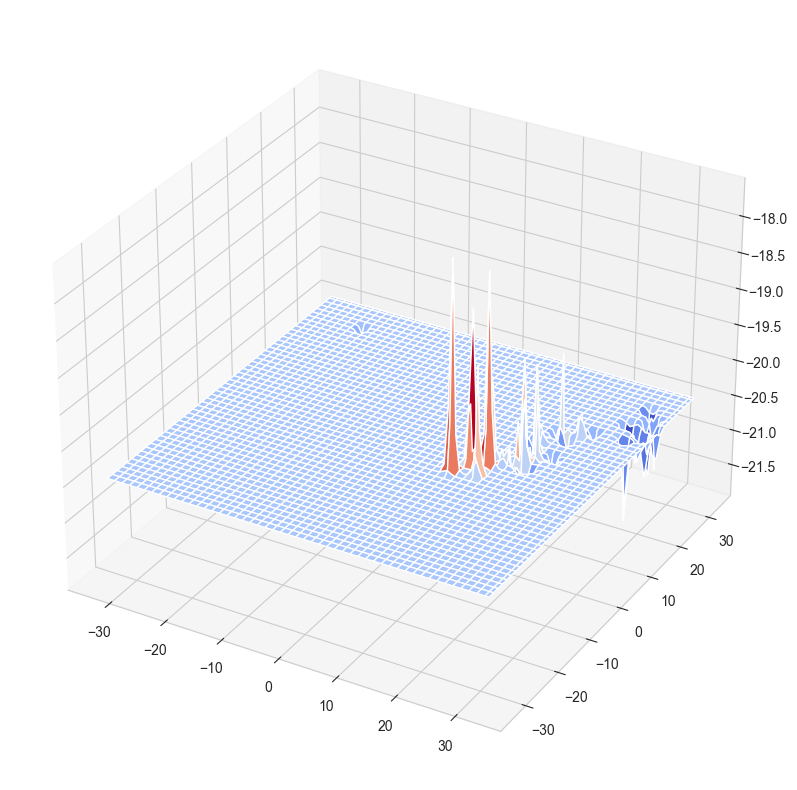

In [142]:
initial_X = torch.tensor([[30., 20.],
                          [20., 5.]])
initial_y = rv.evaluate_true(initial_X).unsqueeze(-1)

for i in range(128):
    new_eval_point, model, likelihood = fit_mll_and_recommend(X=initial_X,
        y=initial_y,
        gp=SingleTaskGP,
        likelihood=ExactMarginalLogLikelihood,
        acquisition_function=UpperConfidenceBound,
        bounds=torch.tensor([[-32.768] * 2, [32.768] * 2]),
        maximize=False,
        acq_function_args={'beta':0.2})

    initial_X = torch.cat([initial_X, new_eval_point])
    initial_y = rv.evaluate_true(initial_X).unsqueeze(-1)
    
with torch.no_grad():
    preds = model.likelihood(model(X)).mean
    
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X[:,0].numpy().reshape(100, 100), 
                X[:,1].numpy().reshape(100, 100), 
                preds.numpy().reshape(100, 100) * -1.,
                cmap=cm.coolwarm)

## Noisy Expected Improvement

In [41]:
best_candidate

tensor([-32.7680, -32.7680])

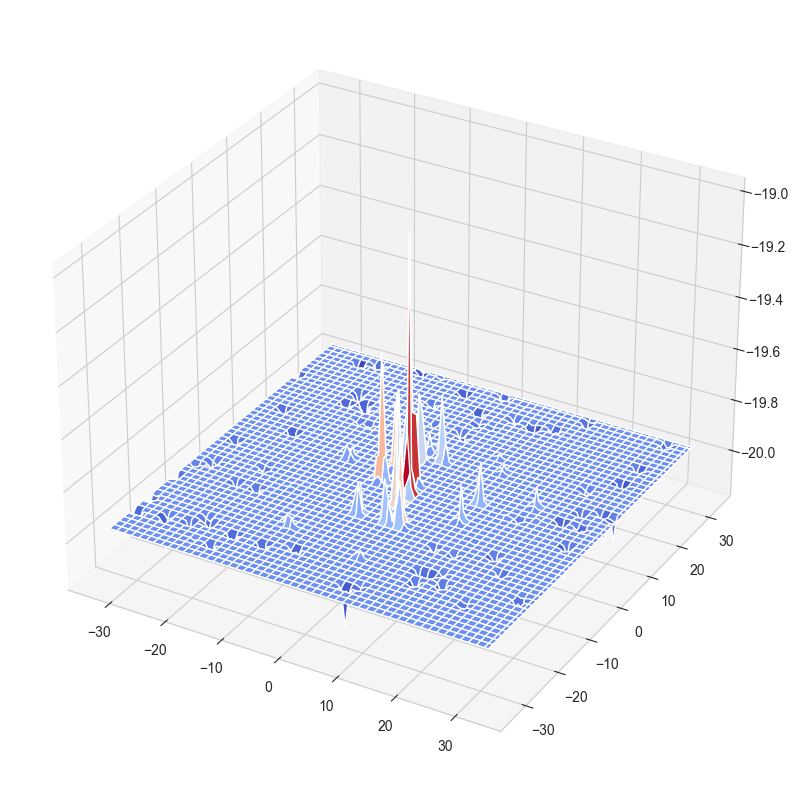

In [85]:
initial_X = torch.tensor([[30., 20.],
                          [20., 5.]])
initial_y = rv.evaluate_true(initial_X).unsqueeze(-1)
initial_yvar = torch.full_like(initial_y,0.2)
maximize=False
bounds=torch.tensor([[-32.768] * 2, [32.768] * 2])

for i in range(100):
    
    model = FixedNoiseGP(train_X=initial_X, train_Y=initial_y, train_Yvar=initial_yvar)
    mll = ExactMarginalLogLikelihood(model.likelihood, model)
    fit_gpytorch_mll(mll)
    if maximize:
        best_candidate = X[y.argmax()].reshape(-1,2)
    else:
        best_candidate = X[y.argmin()].reshape(-1,2)
    
    acq = NoisyExpectedImprovement(model=model, 
                                   X_observed=best_candidate, 
                                   maximize=maximize)
    
    new_eval_point, _ = optimize_acqf(
        acq_function=acq,
        bounds=bounds,
        q=1,
        num_restarts=20,
        raw_samples=100,
        return_best_only=True,
        options={})

    initial_X = torch.cat([initial_X, new_eval_point])
    initial_y = rv.evaluate_true(initial_X).unsqueeze(-1)
    initial_yvar = torch.ones_like(initial_y) * 9
    
with torch.no_grad():
    preds = model.likelihood(model(X), noise=torch.rand(X.shape[0])).mean
    
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X[:,0].numpy().reshape(100, 100), 
                X[:,1].numpy().reshape(100, 100), 
                preds.numpy().reshape(100, 100) * -1.,
                cmap=cm.coolwarm)

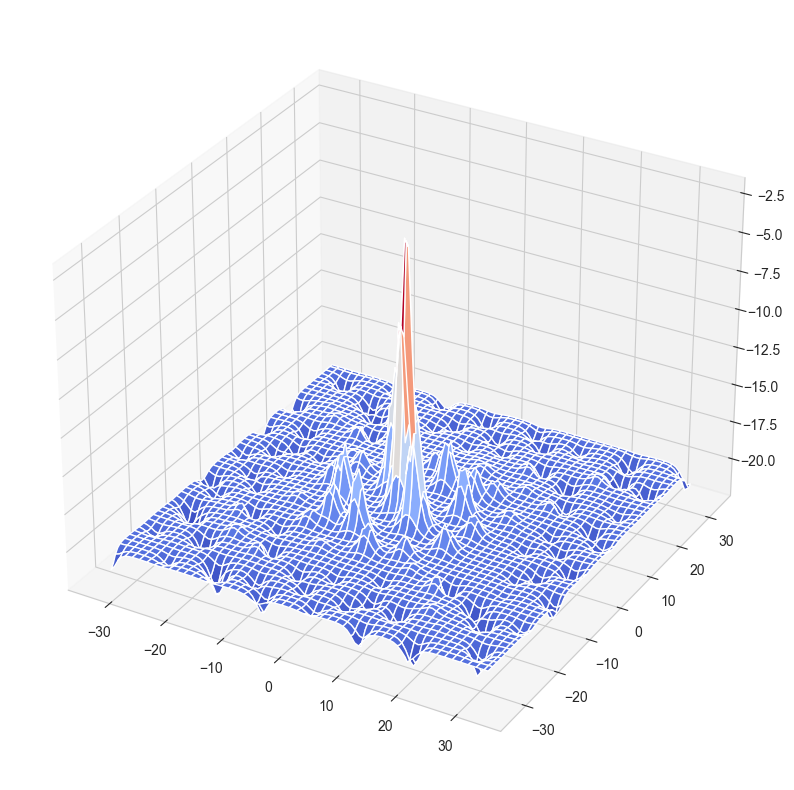

In [120]:
from scipy.stats.qmc import Sobol

sobol_points = torch.tensor(Sobol(d=2, scramble=False).random_base2(m=7))
sobol_points = sobol_points * 32.768 * 2 - 32.768

sobol_values = rv.evaluate_true(sobol_points).unsqueeze(-1)
new_eval_point, model, likelihood = fit_mll_and_recommend(X=sobol_points,
        y=sobol_values,
        gp=SingleTaskGP,
        likelihood=ExactMarginalLogLikelihood,
        acquisition_function=ExpectedImprovement,
        bounds=torch.tensor([[-32.768] * 2, [32.768] * 2]),
        maximize=False)

with torch.no_grad():
    preds = model.likelihood(model(X)).mean
    
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X[:,0].numpy().reshape(100, 100), 
                X[:,1].numpy().reshape(100, 100), 
                preds.numpy().reshape(100, 100) * -1.,
                cmap=cm.coolwarm)

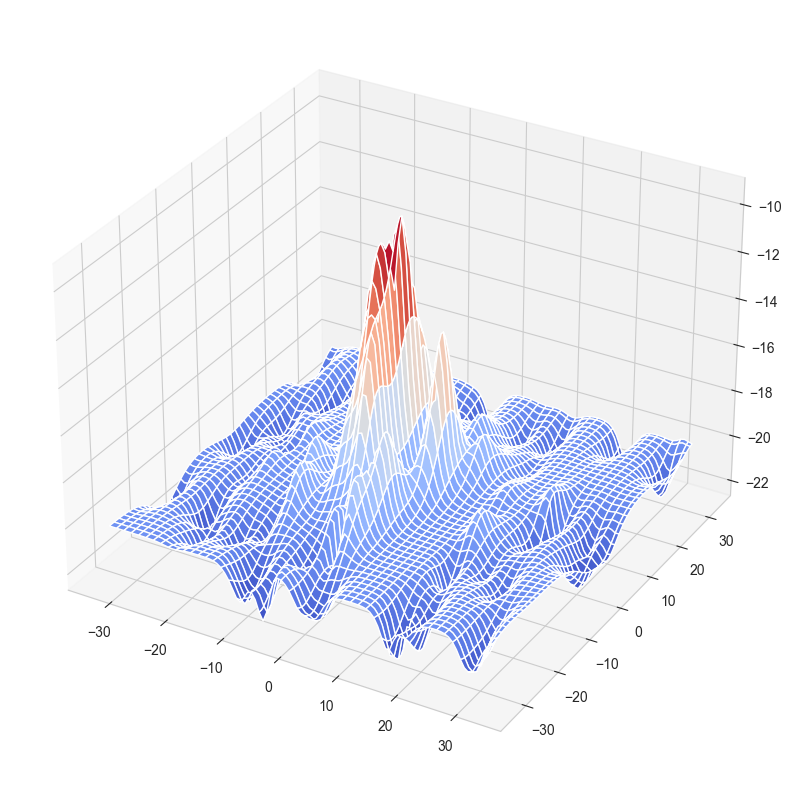

In [112]:
import numpy as np
uniform_points = torch.tensor(np.random.uniform(low=-32.768, high=32.768, size=(100,2)))

uniform_values = rv.evaluate_true(uniform_points).unsqueeze(-1)
new_eval_point, model, likelihood = fit_mll_and_recommend(X=uniform_points,
        y=uniform_values,
        gp=SingleTaskGP,
        likelihood=ExactMarginalLogLikelihood,
        acquisition_function=ExpectedImprovement,
        bounds=torch.tensor([[-32.768] * 2, [32.768] * 2]),
        maximize=False)

with torch.no_grad():
    preds = model.likelihood(model(X)).mean
    
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X[:,0].numpy().reshape(100, 100), 
                X[:,1].numpy().reshape(100, 100), 
                preds.numpy().reshape(100, 100) * -1.,
                cmap=cm.coolwarm)

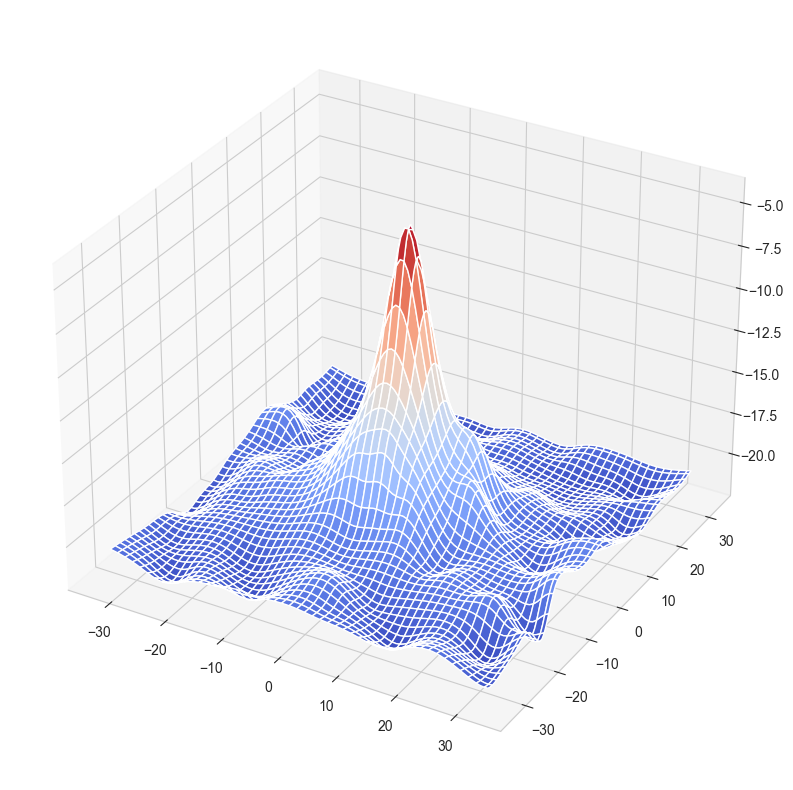

In [141]:
import numpy as np
uniform_points = torch.tensor(np.random.uniform(low=-32.768, high=32.768, size=(128,2)))

uniform_values = rv.evaluate_true(uniform_points).unsqueeze(-1)
new_eval_point, model, likelihood = fit_mll_and_recommend(X=uniform_points,
        y=uniform_values,
        gp=SingleTaskGP,
        likelihood=ExactMarginalLogLikelihood,
        acquisition_function=ExpectedImprovement,
        bounds=torch.tensor([[-32.768] * 2, [32.768] * 2]),
        maximize=False)

with torch.no_grad():
    preds = model.likelihood(model(X)).mean
    
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X[:,0].numpy().reshape(100, 100), 
                X[:,1].numpy().reshape(100, 100), 
                preds.numpy().reshape(100, 100) * -1.,
                cmap=cm.coolwarm)

## Initialize with Sobol

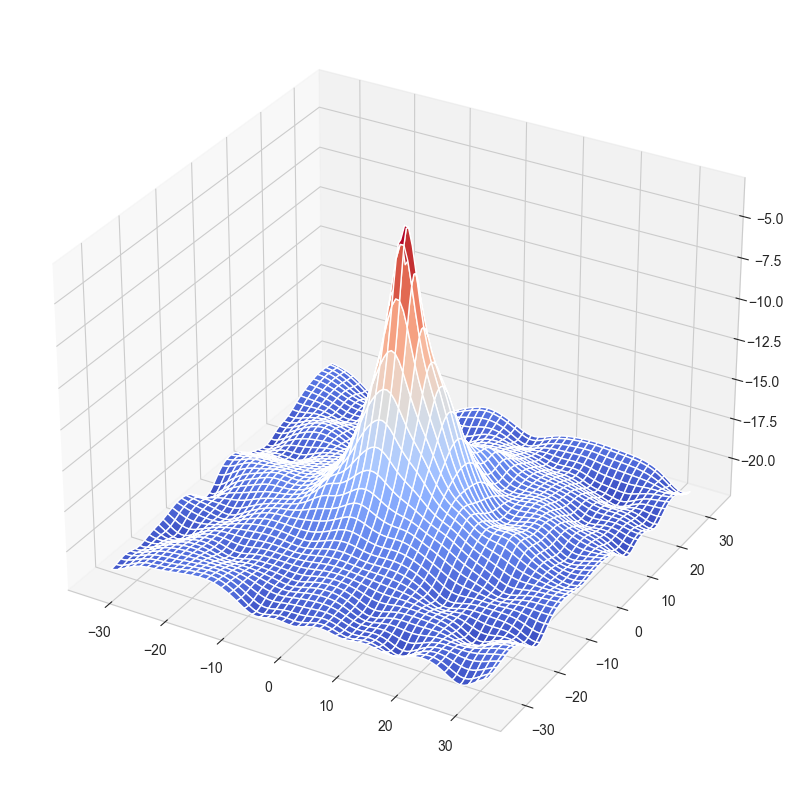

In [145]:
sobol_points = torch.tensor(Sobol(d=2, scramble=False).random_base2(m=3))
sobol_points = sobol_points * 32.768 * 2 - 32.768

initial_X = sobol_points
initial_y = rv.evaluate_true(initial_X).unsqueeze(-1)

for i in range(100):
    new_eval_point, model, likelihood = fit_mll_and_recommend(X=initial_X,
        y=initial_y,
        gp=SingleTaskGP,
        likelihood=ExactMarginalLogLikelihood,
        acquisition_function=ExpectedImprovement,
        bounds=torch.tensor([[-32.768] * 2, [32.768] * 2]),
        maximize=False)

    initial_X = torch.cat([initial_X, new_eval_point])
    initial_y = rv.evaluate_true(initial_X).unsqueeze(-1)
    
with torch.no_grad():
    preds = model.likelihood(model(X)).mean
    
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X[:,0].numpy().reshape(100, 100), 
                X[:,1].numpy().reshape(100, 100), 
                preds.numpy().reshape(100, 100) * -1.,
                cmap=cm.coolwarm)

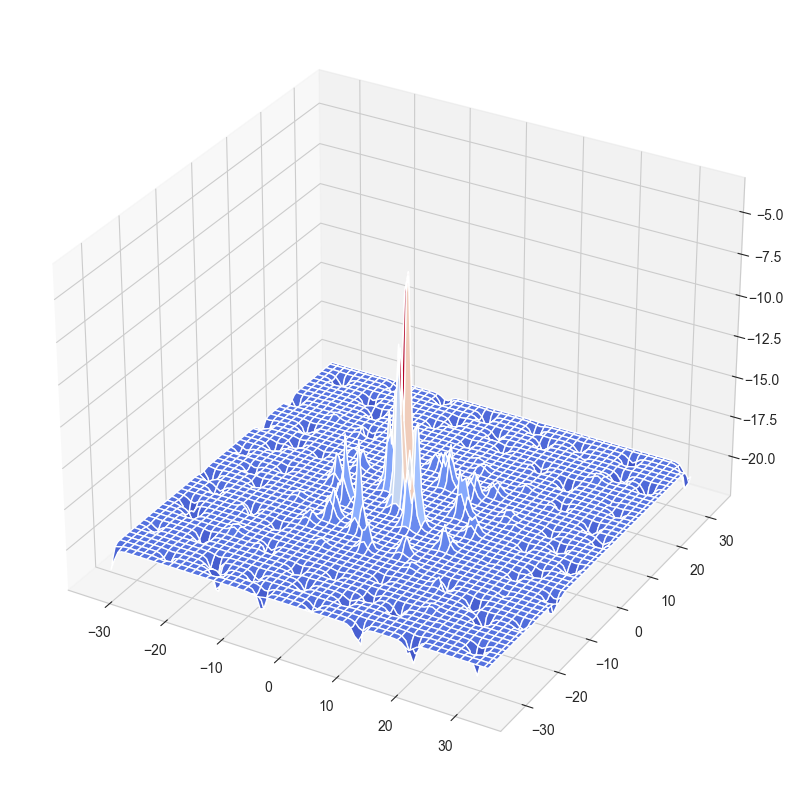

In [146]:
sobol_points = torch.tensor(Sobol(d=2, scramble=False).random_base2(m=7))
sobol_points = sobol_points * 32.768 * 2 - 32.768

initial_X = sobol_points
initial_y = rv.evaluate_true(initial_X).unsqueeze(-1)

for i in range(128):
    new_eval_point, model, likelihood = fit_mll_and_recommend(X=initial_X,
        y=initial_y,
        gp=SingleTaskGP,
        likelihood=ExactMarginalLogLikelihood,
        acquisition_function=UpperConfidenceBound,
        bounds=torch.tensor([[-32.768] * 2, [32.768] * 2]),
        maximize=False,
        acq_function_args={'beta':0.2})

    initial_X = torch.cat([initial_X, new_eval_point])
    initial_y = rv.evaluate_true(initial_X).unsqueeze(-1)
    
with torch.no_grad():
    preds = model.likelihood(model(X)).mean
    
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X[:,0].numpy().reshape(100, 100), 
                X[:,1].numpy().reshape(100, 100), 
                preds.numpy().reshape(100, 100) * -1.,
                cmap=cm.coolwarm)

In [147]:
initial_X.shape

torch.Size([256, 2])